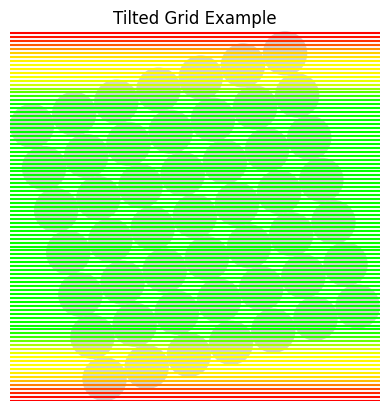

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from grid_genius.square import Grid

def score_to_color(score, min_score, max_score):
    # Normalize the score between 0 and 1
    normalized = (score - min_score) / (max_score - min_score)
    
    # Create color gradient: red -> yellow -> green
    if normalized < 0.5:
        # Red to Yellow (increase green)
        red = 255
        green = int(normalized * 2 * 255)
    else:
        # Yellow to Green (decrease red)
        red = int((1 - normalized) * 2 * 255)
        green = 255
    
    hex_color = f'#{red:02x}{green:02x}{0:02x}'
    return hex_color

df = pd.read_csv('./simulation_results.csv')
df['scores'] = df['scores'].apply(eval)

for angle in [16]:

    scores = list(df['scores'].iloc[angle])
    min_score = min(scores)
    max_score = max(scores)

    colors = []
    for i, score in enumerate(scores):
        if i % 12 == 0:
            color = score_to_color(score, min_score, max_score)
            colors.append(color)
        else:
           colors.append('')

    my_grid = Grid(n=7, radius=0.49)
    my_grid.rotate_grid(angle)
    my_grid.plot_coordinates(color_scheme=colors, gray_scale=True)


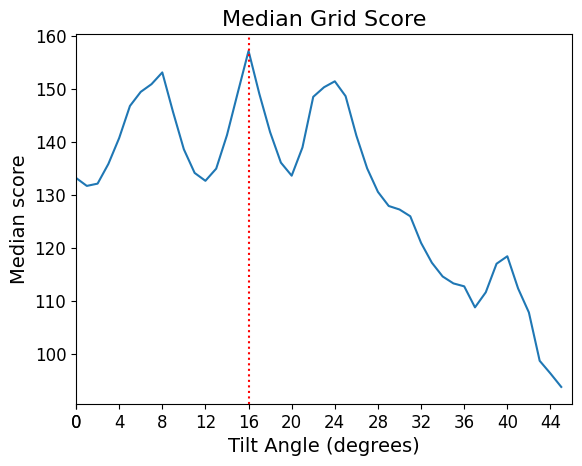

In [55]:
plt.figure()

plt.title('Median Grid Score', fontsize=16)

plt.plot(df['angle'], df['median'])
plt.axvline(x=16, color='red', linestyle="dotted")

plt.xlabel('Tilt Angle (degrees)', fontsize=14)
plt.ylabel('Median score', fontsize=14)
plt.xticks([0] + list(range(0, 48, 4)))
plt.xlim(0, 46)
plt.tick_params(axis='both', which='major', labelsize=12)



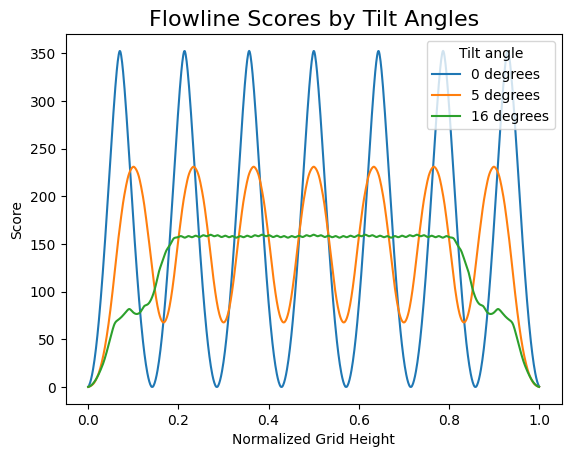

In [52]:
filtered_angle = df[df["angle"].isin([0, 5, 16])]


plt.figure()
plt.title("Flowline Scores by Tilt Angles", fontsize=16)


for idx, items in filtered_angle.iterrows():
    y_values = items["scores"]
    angle = items["angle"]
    
    x_values = np.linspace(0,  1, num=len(y_values), endpoint=True)

    plt.plot(x_values, y_values, label=f"{angle} degrees")

plt.ylabel("Score")
plt.xlabel("Normalized Grid Height")
plt.legend(title="Tilt angle", loc='upper right')
plt.show()



In [2]:
from particle import decay

scorer = decay(0.49 + 0.04)

[-3.14010408  3.61539719 -0.01975689]


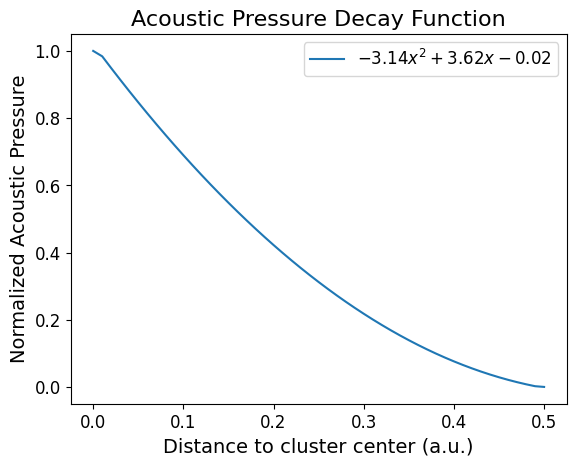

In [25]:
x_values = np.arange(start=0, stop=0.51, step=0.01)
y_values = [scorer(x) for x in x_values]

# Coefficients
a = -3.14010408
b = 3.61539719
c = -0.01975689
equation_str = f"${a:.2f}x^2 + {b:.2f}x {c:.2f}$"

plt.figure()
plt.title("Acoustic Pressure Decay Function", fontsize=16)
plt.ylabel("Normalized Acoustic Pressure", fontsize=14)
plt.plot(x_values, y_values, label=equation_str)
plt.xlabel("Distance to cluster center (a.u.)", fontsize=14)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [ ]:
plt.figure()
plt.title('Mean Grid Score')

plt.plot(df['angle'], df['mean'])
plt.axvline(x=16, color='red', linestyle="dotted")

plt.xlabel('Tilt Angle (degrees)')
plt.ylabel('Mean score')
plt.xticks([0] + list(range(0, 48, 4)))
plt.xlim(0, 46)
plt.show()